# Brain stroke Prediction Model

## Steps
1. Load data
2. clean data
3. convert categorical data
4. train test spilt data
5. standardize data
6. create model
7. optimize data
8. recommedation

In [70]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [96]:
file = '/Users/Jerry/Documents/UCI Bootcamp/project_4/Resources/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

### Explore Data

In [73]:
#check value counts for each column

#columns for further exploration
#df["bmi"].value_counts()
#df["smoking_status"].value_counts()

In [74]:
print(f'Number of Rows: {len(df)}')
print(f'BMI Null values: {df["bmi"].isnull().sum()}')
print(f'Percentage of Nulls: {round(201/5110, 2)}')
#Opinion is we get rid of those 201 rows

Number of Rows: 5110
BMI Null values: 201
Percentage of Nulls: 0.04


In [75]:
#number of unknown values in 'smoking_status
df["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [97]:
#drop unneccessary columns
df = df.drop('id', axis=1)
df = df.loc[(df["gender"] != "Other"), :]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [182]:
#create a new column with each patient grouped by their bmi

#grouping layout
bmi_rate = ["0-10", "11-15", "16-20", "21-25", "26-30", "30-40", "40+"]

#round bmi's 
rounded_bmi_values = [round(item, 2) for item in df['bmi']]

#create empty list to append new grouping into
grouped_bmi = []

#for loop to correctly classify each bmi into correct grouping
for value in range(len(rounded_bmi_values)):
    if rounded_bmi_values[value] <= 10: 
        grouped_bmi.append("0-10")
    elif rounded_bmi_values[value] <= 15: 
        grouped_bmi.append("11-15")
    elif rounded_bmi_values[value] <= 20: 
        grouped_bmi.append("16-20")
    elif rounded_bmi_values[value] <= 25: 
        grouped_bmi.append("21-25")
    elif rounded_bmi_values[value] <= 30: 
        grouped_bmi.append("26-30")
    elif rounded_bmi_values[value] < 40: 
        grouped_bmi.append("30-40")
    else: 
        grouped_bmi.append("40+")

#check for loop 
print(bmi_values[4])
print(grouped_bmi[4])

#add list to df
df["bmi_grouping"] = grouped_bmi
df.head()

37
21-25


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_grouping
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-70,30-40
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-70,40+
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,70+,30-40
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50,30-40
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70+,21-25


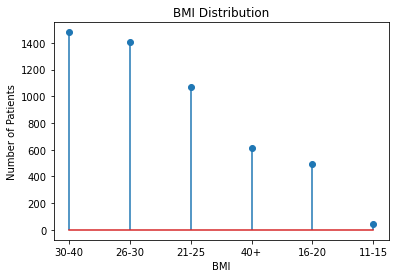

In [185]:
y = df["bmi_grouping"].value_counts().values
x = df["bmi_grouping"].value_counts().index
plt.stem(x, y)
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.title("BMI Distribution")
plt.show()

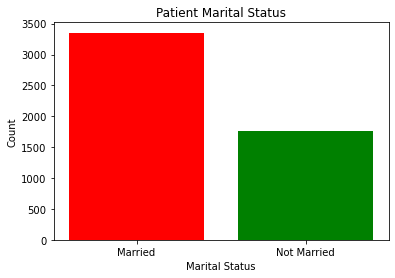

In [161]:
married = df["ever_married"].value_counts().values
x = ["Married", "Not Married"]
plt.bar(x, married, color = ['red', 'green'])
plt.title("Patient Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

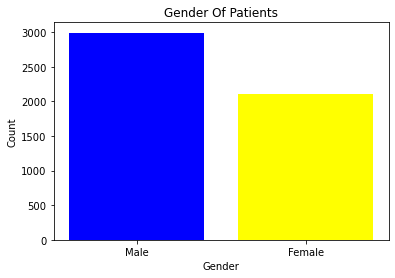

In [155]:
gender = df['gender'].unique()
count = df['gender'].value_counts().values
plt.bar(gender, count, color = ["blue", "yellow"])
plt.title("Gender Of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")

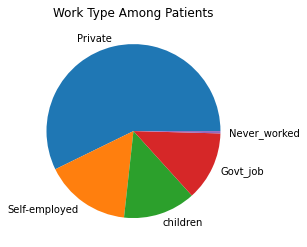

In [83]:
plt.pie(df["work_type"].value_counts(), labels=df["work_type"].value_counts().index)
plt.title("Work Type Among Patients")
plt.show()

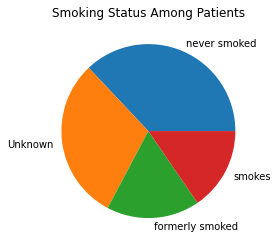

In [159]:
plt.pie(df["smoking_status"].value_counts(), labels=df["smoking_status"].value_counts().index)
plt.title("Smoking Status Among Patients")
plt.show()

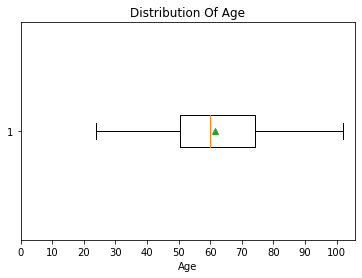

In [84]:
#plot age distribution
plt.boxplot(df['age'].value_counts(), vert=False, showmeans=True)
plt.title("Distribution Of Age")
plt.xlabel('Age')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

/var/folders/7y/crgpl7c16kz6hr5b9zbdn3vh0000gp/T/ipykernel_1259/781021112.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['']+ticks)
/var/folders/7y/crgpl7c16kz6hr5b9zbdn3vh0000gp/T/ipykernel_1259/781021112.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['']+ticks)


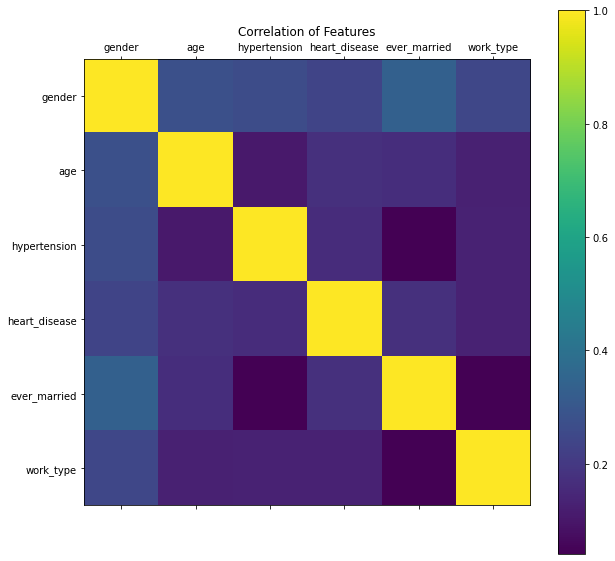

In [158]:
#check correlation of features
ticks = df.columns.to_list()
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(df.corr(), interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels(['']+ticks)
axes.set_yticklabels(['']+ticks)

plt.title("Correlation of Features") 
plt.show()

In [99]:
#convert dtype to int64
df["age"] = df["age"].astype(np.int64)

#create age groups
age_list = df["age"].tolist()
age_group = []
for i in range(0, len(df["age"])):
    if age_list[i]  < 10:
        age_group.append("0-10")
    elif age_list[i] < 20:
        age_group.append("10-20")
    elif age_list[i] < 30:
        age_group.append("20-30")
    elif age_list[i] < 40:
        age_group.append("30-40")
    elif age_list[i] < 50:
        age_group.append("40-50")
    elif age_list[i] < 60:
        age_group.append("50-60")
    elif age_list[i] < 70:
        age_group.append("60-70")
    else:
        age_group.append("70+")

#check for loop 
print(age_list[4])
print(age_group[4])

#add age_group column to df
df["age_group"] = age_group
df.head()

79
70+


In [101]:
#spilt data into two dataframes based on whether they had a stroke or not
stroke_df = df.loc[(df["stroke"] == 1), :]
no_stroke_df = df.loc[(df["stroke"] == 0), :]

In [117]:
#use value counts function to get count of strokes by age and to get the total number of patients in each age group
df["age_group"].value_counts()
stroke_df["age_group"].value_counts()


percent = [134/755, 48/834, 47/621, 12/730, 6/655, 1/472, 1/494]
rounded_list = []
for i in percent:
    value = round(i, 4)
    rounded_list.append(value)
print(rounded_list)

[0.1775, 0.0576, 0.0757, 0.0164, 0.0092, 0.0021, 0.002]


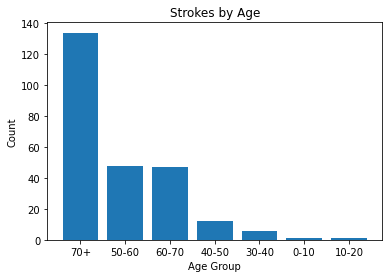

In [91]:
y_values = stroke_df["age_group"].value_counts().values
x_values = stroke_df["age_group"].value_counts().index
plt.bar(x_values, y_values)
plt.title("Strokes by Age")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

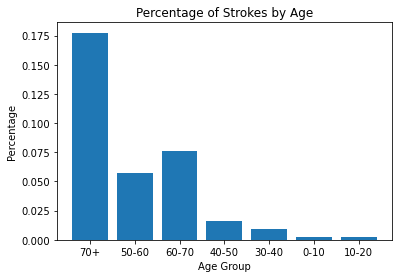

In [118]:
x_values = stroke_df["age_group"].value_counts().index
plt.bar(x_values, rounded_list)
plt.title("Percentage of Strokes by Age")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.show()

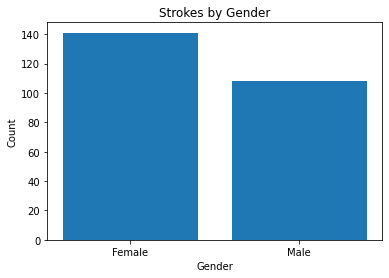

In [92]:
y_gender = stroke_df["gender"].value_counts().values
x_gender = stroke_df["gender"].value_counts().index
plt.bar(x_gender, y_gender)
plt.title("Strokes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

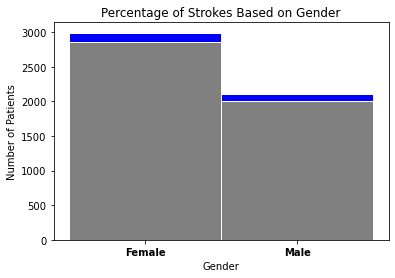

In [166]:
#number of patients who did not have a stroke based on gender
no_stroke_gender = no_stroke_df["gender"].value_counts().values
no_stroke_gender

# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Female','Male']
barWidth = 1
 
# Create brown bars
plt.bar(r, no_stroke_gender, color="grey", edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, y_gender, bottom=no_stroke_gender, color='blue', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Percentage of Strokes Based on Gender")

# Show graphic
plt.show()

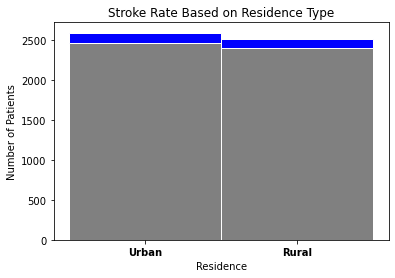

In [165]:
#number of patients who did not have a stroke based on their residence type
no_stroke_residence = no_stroke_df["Residence_type"].value_counts().values
y_residence = stroke_df["Residence_type"].value_counts().values
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Urban','Rural']
barWidth = 1
 
# Create brown bars
plt.bar(r, no_stroke_residence, color="grey", edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, y_residence, bottom=no_stroke_residence, color='blue', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Residence")
plt.ylabel("Number of Patients")
plt.title("Stroke Rate Based on Residence Type")
 
# Show graphic
plt.show()

In [121]:
#stroke_df["hypertension"].value_counts()
stroke_df["heart_disease"].value_counts()

0    202
1     47
Name: heart_disease, dtype: int64

### Preprocess Data

In [34]:
# code to predict missing bmi values, originally from kaggle
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [36]:
#convert categorical columns into numerical values
df_processed = pd.get_dummies(df)
df_processed.shape

(5110, 23)

In [37]:
#spilt data into x and y variables
y = df_processed ['stroke']
X = df_processed.drop('stroke', axis=1)

In [38]:
#create train and test dataset for X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Setting up StandardScaler
scaler = StandardScaler()

# Fitting training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
#create SVC model
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [42]:
#check accuracy
print('Test Accuracy: %.3f' % model.score(X_test_scaled, y_test))

Test Accuracy: 0.937


In [43]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=['No Stroke', 'Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97      1198
      Stroke       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



/Users/Jerry/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jerry/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jerry/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
